In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

In [2]:
s1_links = pd.read_excel("MS_Annika_results/S1_deiso_top2_1%_Crosslinks_nodecoy.xlsx")
s2_links = pd.read_excel("MS_Annika_results/S2_deiso_top2_1%_Crosslinks_nodecoy.xlsx")
s3_links = pd.read_excel("MS_Annika_results/S3_deiso_top2_1%_Crosslinks_nodecoy.xlsx")

In [3]:
def barplot(labels, counts, colors, title):
    fig, ax = plt.subplots()
    ax.set_xlabel("Replicate")
    ax.set_ylabel("Crosslinks at 1% FDR")
    ax.set_title(title)
    bars = ax.bar(labels, counts, color = colors)
    ax.bar_label(bars)
    return plt

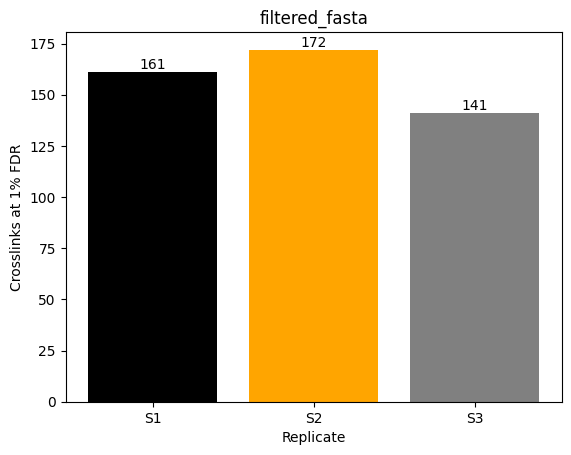

In [4]:
barplot(["S1", "S2", "S3"], [s1_links.shape[0], s2_links.shape[0], s3_links.shape[0]], ["black", "orange", "grey"], "filtered_fasta");

In [5]:
def get_crosslinks(df):
    xl = set()
    for i, row in df.iterrows():
        current_xl = "--".join(sorted([str(row["Sequence A"]).strip() + "_" + str(row["Position A"]).strip(), str(row["Sequence B"]).strip() + "_" + str(row["Position B"]).strip()]))
        xl.add(current_xl)
    return xl

In [6]:
s1 = get_crosslinks(s1_links)
s2 = get_crosslinks(s2_links)
s3 = get_crosslinks(s3_links)
print(f"s1: {len(s1)}, s2: {len(s2)}, s3: {len(s3)}")

s1: 161, s2: 172, s3: 141


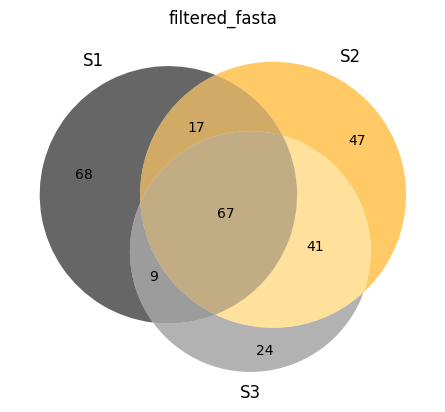

In [7]:
venn(s1, s2, s3, labels = ["S1", "S2", "S3"], colors = ["black", "orange", "grey"], title = "filtered_fasta");

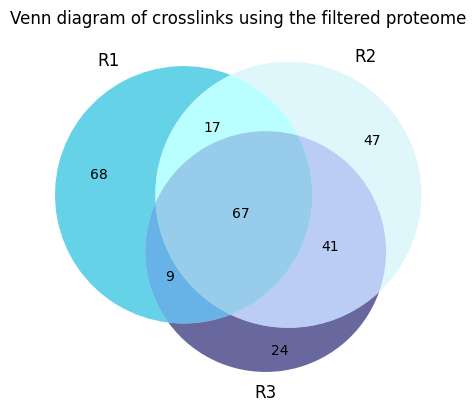

In [8]:
venn(s1, s2, s3,
     labels = ["R1", "R2", "R3"],
     colors = ["#00b4d8", "#caf0f8", "#03045e"],
     title = "Venn diagram of crosslinks using the filtered proteome",
     filename = "filtered_proteome");

In [9]:
f"Total crosslinks at 1% FDR across S1, S2 and S3: {len(s1.union(s2, s3))}"

'Total crosslinks at 1% FDR across S1, S2 and S3: 273'

In [10]:
s1_fp_links = pd.read_excel("MS_Annika_results/S1_deiso_top2_fp_1%_Crosslinks_nodecoy.xlsx")
s2_fp_links = pd.read_excel("MS_Annika_results/S2_deiso_top2_fp_1%_Crosslinks_nodecoy.xlsx")
s3_fp_links = pd.read_excel("MS_Annika_results/S3_deiso_top2_fp_1%_Crosslinks_nodecoy.xlsx")

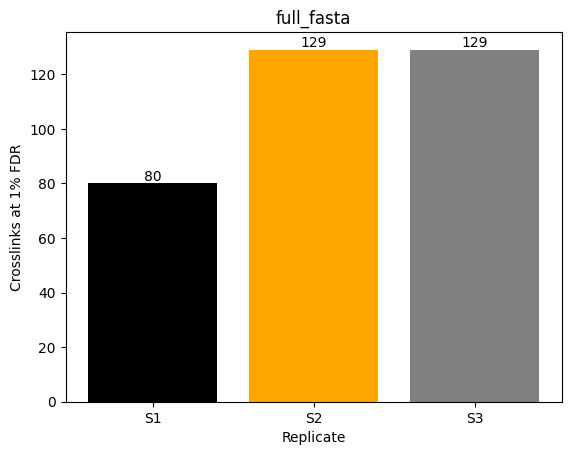

In [11]:
barplot(["S1", "S2", "S3"], [s1_fp_links.shape[0], s2_fp_links.shape[0], s3_fp_links.shape[0]], ["black", "orange", "grey"], "full_fasta");

In [12]:
s1_fp = get_crosslinks(s1_fp_links)
s2_fp = get_crosslinks(s2_fp_links)
s3_fp = get_crosslinks(s3_fp_links)
print(f"s1_fp: {len(s1_fp)}, s2_fp: {len(s2_fp)}, s3: {len(s3_fp)}")

s1_fp: 80, s2_fp: 129, s3: 129


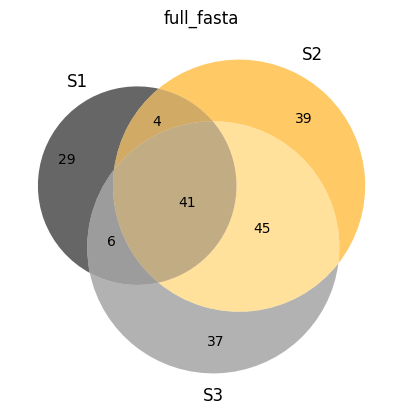

In [13]:
venn(s1_fp, s2_fp, s3_fp, labels = ["S1", "S2", "S3"], colors = ["black", "orange", "grey"], title = "full_fasta");

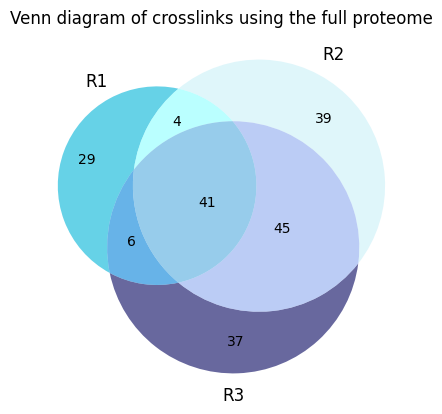

In [14]:
venn(s1_fp, s2_fp, s3_fp,
     labels = ["R1", "R2", "R3"],
     colors = ["#00b4d8", "#caf0f8", "#03045e"],
     title = "Venn diagram of crosslinks using the full proteome",
     filename = "full_proteome");

In [15]:
f"Total crosslinks at 1% FDR across S1, S2 and S3: {len(s1_fp.union(s2_fp, s3_fp))}"

'Total crosslinks at 1% FDR across S1, S2 and S3: 201'

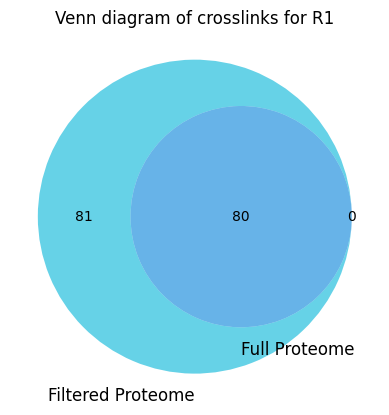

In [16]:
venn(s1, s1_fp,
     labels = ["Filtered Proteome", "Full Proteome"],
     colors = ["#00b4d8", "#03045e"],
     title = "Venn diagram of crosslinks for R1",
     filename = "R1");

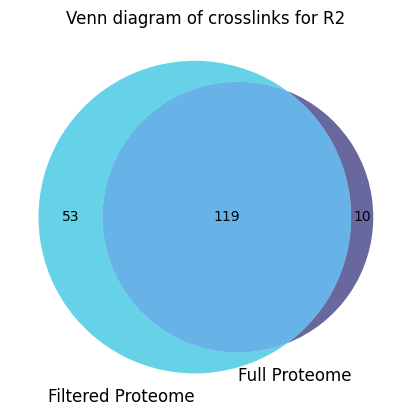

In [17]:
venn(s2, s2_fp,
     labels = ["Filtered Proteome", "Full Proteome"],
     colors = ["#00b4d8", "#03045e"],
     title = "Venn diagram of crosslinks for R2",
     filename = "R2");

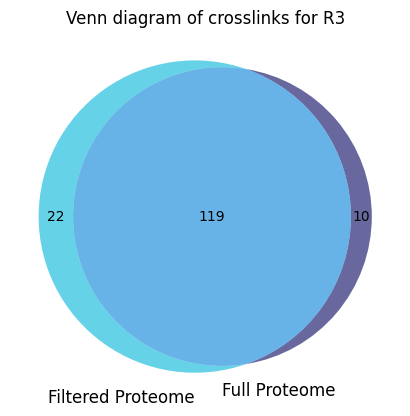

In [18]:
venn(s3, s3_fp,
     labels = ["Filtered Proteome", "Full Proteome"],
     colors = ["#00b4d8", "#03045e"],
     title = "Venn diagram of crosslinks for R3",
     filename = "R3");